In [1]:
#Import libraries
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# # from sklearn.inspection import permutation_importance
# from sklearn.metrics import classification_report
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import svm
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings("ignore")

### OBJECTIVE
This project contains data on customers of a food company marketing campaign. The project will strive to clean and explore the data (e.g. customer segmentation, plausible correlations etc.), and develop models to predict customer behavior in order to maximize the profits of the campaign. 
Source: https://www.kaggle.com/datasets/jackdaoud/marketing-data/data

# DATA IMPORTING AND SUMMARY

In [3]:
#Reading the data file
data = pd.read_csv('ifood_df.csv')

In [4]:
data.shape

(2205, 39)

We have 2205 rows and 39 columns. 

In [5]:
#Taking a look at the top 5 rows of the data
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


There are a mix of categorical and numerical columns. We need to refer to the original metadata to see the indicator definitions. 

In [6]:
data.info()
#data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

There are no missing values in the dataset. "Income" (yearly HH income) is the only float type column and all the rest are integer types. 

In [7]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


# PREPROCESSING AND EDA

In [8]:
# continuous variables list
data_continuous = data[["Customer_Days", "AcceptedCmpOverall", "Income", "MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds", "NumDealsPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases", "NumWebVisitsMonth", "Recency", "Age", "MntTotal"]]

In [9]:
# Categorical variables list
data_categorical = data[["Kidhome", "Teenhome", "Response", "Complain", "education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD", "marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"]]

#### Checking and removing outliers 

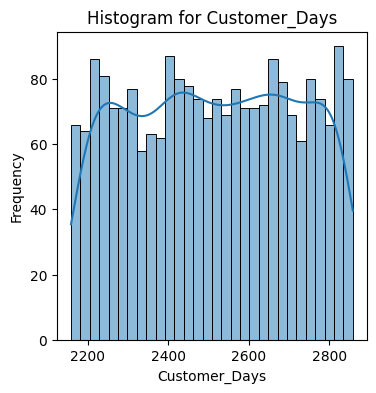

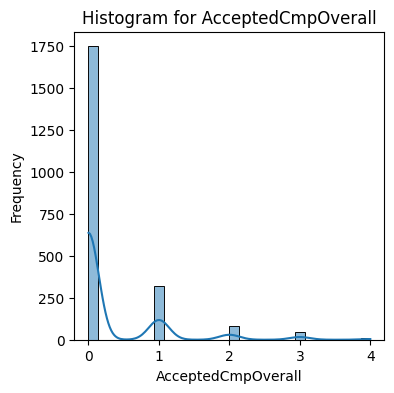

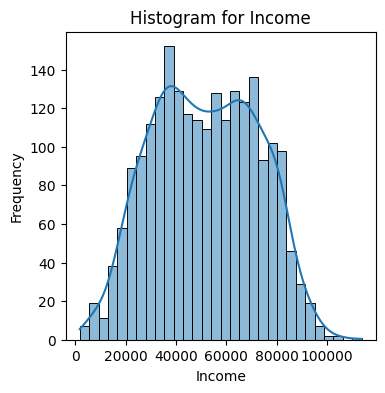

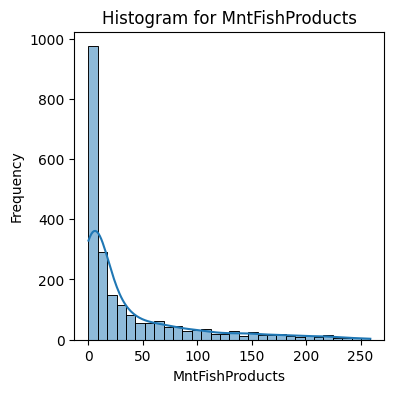

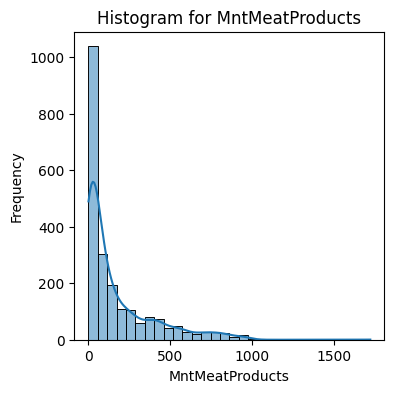

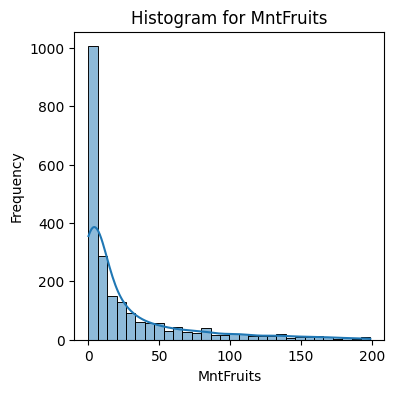

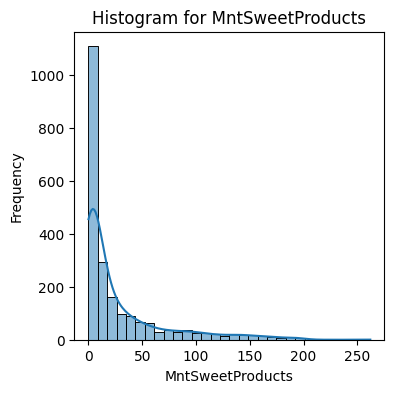

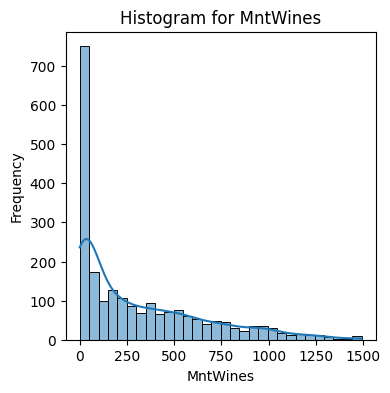

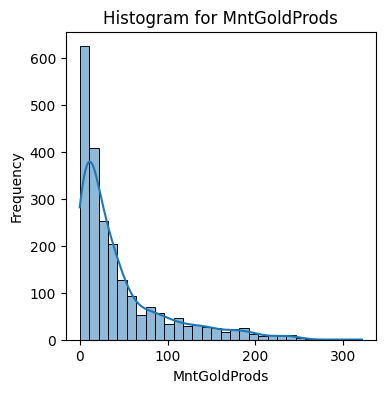

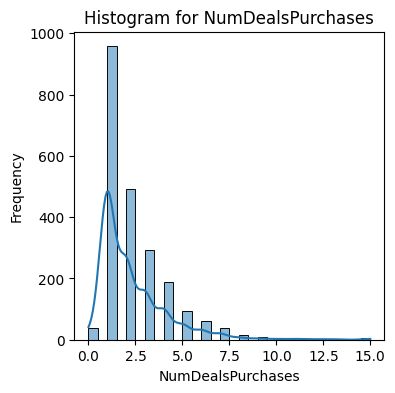

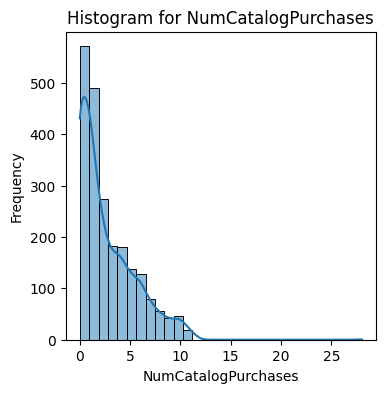

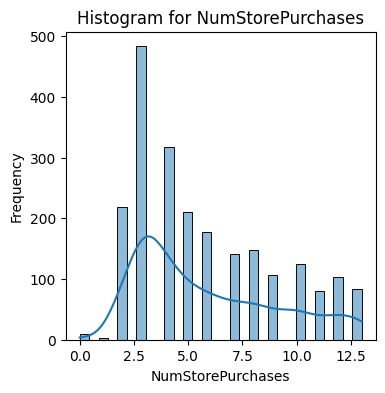

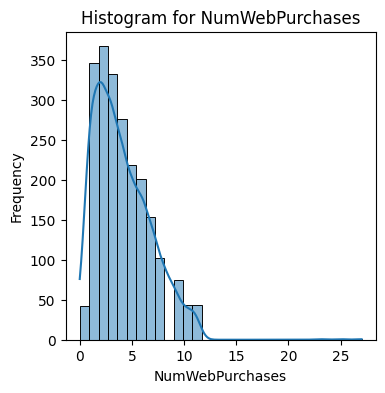

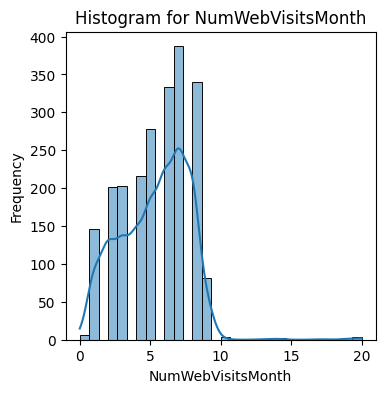

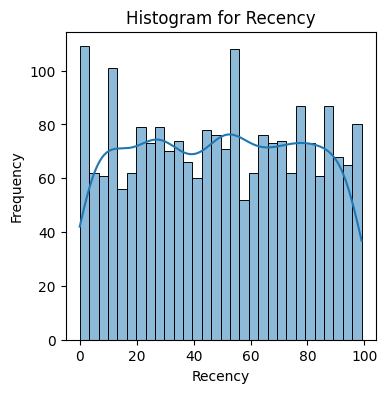

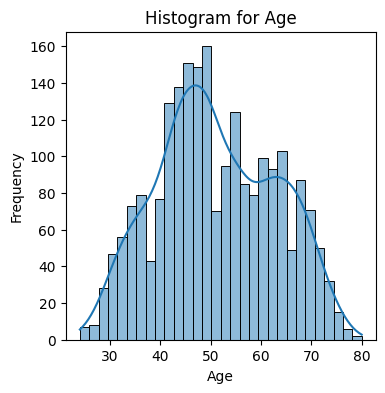

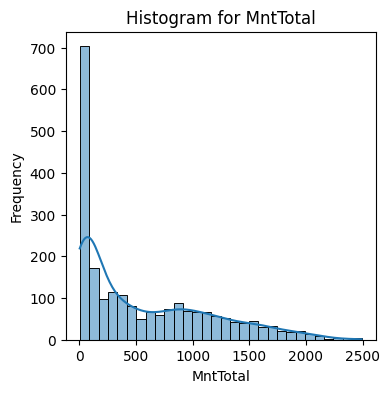

In [10]:
for col in data_continuous: 
    plt.figure(figsize=(4,4))  
    sns.histplot(data=data_continuous, x=col, bins=30, kde=True)
    plt.title('Histogram for' + ' ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

We will try to focus on a few key indicators to check for outliers. Based on the histograms and density plots, Income seems to normally distributed. We can even check the summary in earlier section to verify that the mean and median (at 50%ile) are very close. Same We can check the boxplots for total amount spent, Age, and Recency. 

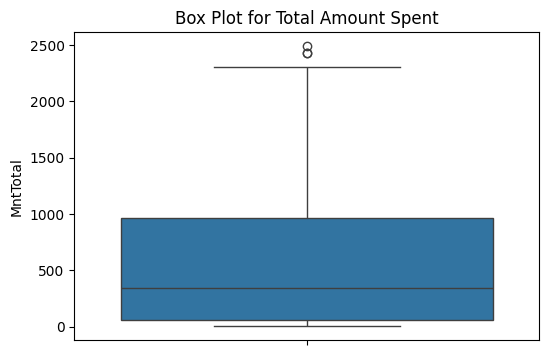

In [11]:
#Box plot for total amount spent
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for Total Amount Spent')
plt.ylabel('MntTotal')
plt.show()

In [12]:
#Remove data lower than Q1-1.5IQR or upper than Q3 + 1.5IQR i.e. outliers
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)

In [13]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [15]:
#This is insignificant amount of data and we can get rid of it
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]

#### Correlation plots and tests for cutomer segemntation

For correlation between continuous variables, we will use Pearson correlation. 
For ordinal variables, we will use Spearman rank correlation. 
For categorical (binary) and continuous variables, we will use Point-Biserial Correlation. 

In [16]:
data_demographics = ['Income','Age']
data_children = ['Kidhome', 'Teenhome']
data_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
data_amnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_communication = ['Complain', 'Response', 'Customer_Days']
data_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
data_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

##### Demographics and Total Amount Spent (Pearson Correlation)

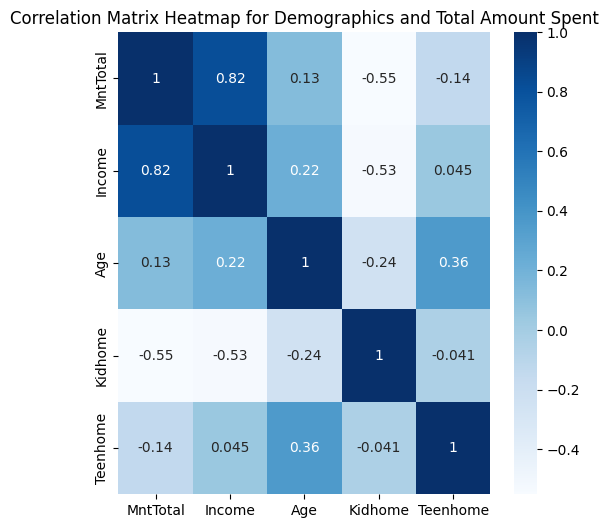

In [17]:
#Check correlation of total amount spent with the continuous and discrete indicators
corr_matrix_dem = data[['MntTotal']+ data_demographics + data_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix_dem, annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap for Demographics and Total Amount Spent')
plt.show()

MntTotal has strong positive correlation with income and intermediate negative correlation with Kidhome. Income has an intermediate negative correlation with Kidhome.

##### Source of Purchases and Total Amount Spent (Pearson Correlation)

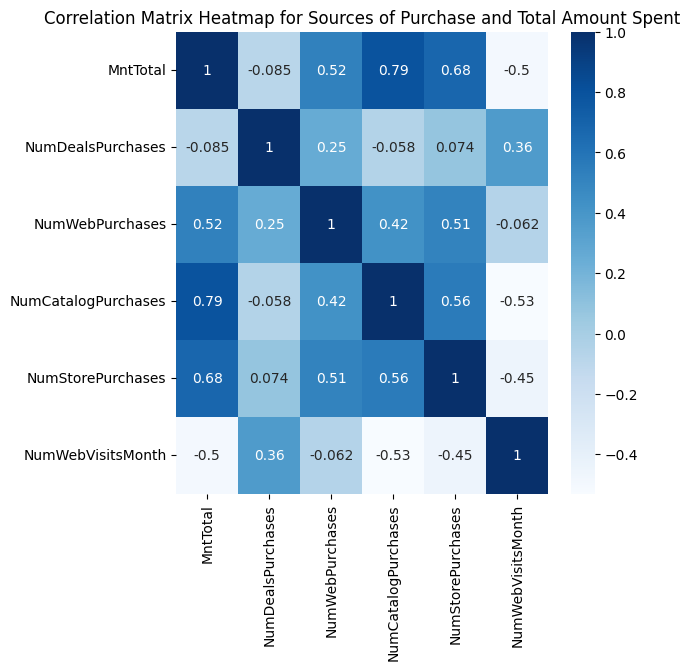

In [18]:
#Check correlation of total amount spent with the continuous and discrete indicators
corr_matrix_source = data[['MntTotal']+ data_source_of_purchase].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix_source, annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap for Sources of Purchase and Total Amount Spent')
plt.show()

Number of web purchases has an intermediate positive correlation with MntTotal. Catalog and Store purchases have a strong positive correlation with MntTotal. Number of Web Visits per Month have an intermediate negative correlation with MntTotal.

##### Marital and Total Amount Spent (Point-Biserial)

In [19]:
for col in data_marital:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Correlation for {col} with MntTotal is {p_value:.4f}') 

0.0053: Correlation for marital_Divorced with MntTotal is 0.8041
-0.0188: Correlation for marital_Married with MntTotal is 0.3767
0.0011: Correlation for marital_Single with MntTotal is 0.9571
0.0008: Correlation for marital_Together with MntTotal is 0.9708
0.0370: Correlation for marital_Widow with MntTotal is 0.0826


No strong correlation found

##### Education and Total Amount Spent (Point-Biserial)

In [20]:
for col in data_education:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Correlation for {col} with MntTotal is {p_value:.4f}') 

-0.0593: Correlation for education_2n Cycle with MntTotal is 0.0054
-0.1389: Correlation for education_Basic with MntTotal is 0.0000
0.0159: Correlation for education_Graduation with MntTotal is 0.4551
0.0004: Correlation for education_Master with MntTotal is 0.9842
0.0737: Correlation for education_PhD with MntTotal is 0.0005


No strong correlation found

##### Campaign Type and Total Amount Spent (Point-Biserial)

In [21]:
for col in data_campaigns:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Correlation for {col} with MntTotal is {p_value:.4f}') 

0.4574: Correlation for AcceptedCmpOverall with MntTotal is 0.0000
0.3836: Correlation for AcceptedCmp1 with MntTotal is 0.0000
0.1399: Correlation for AcceptedCmp2 with MntTotal is 0.0000
0.0404: Correlation for AcceptedCmp3 with MntTotal is 0.0578
0.2624: Correlation for AcceptedCmp4 with MntTotal is 0.0000
0.4671: Correlation for AcceptedCmp5 with MntTotal is 0.0000


No significant/strong correlation found. 

##### Communication and Total Amount Spent (Point-Biserial)

In [22]:
for col in data_communication:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Correlation for {col} with MntTotal is {p_value:.4f}') 

-0.0328: Correlation for Complain with MntTotal is 0.1242
0.2610: Correlation for Response with MntTotal is 0.0000
0.1550: Correlation for Customer_Days with MntTotal is 0.0000


No significant correlation found. 

#### Feature Engineering

In [23]:
def education_level(row):
    if row['education_Graduation'] == 1:
        return 'High'
    elif row['education_Master'] == 1:
        return 'High'
    elif row['education_PhD'] == 1:
        return 'High'
    elif row['education_Basic'] == 1:
        return 'Basic'
    elif row['education_2n Cycle'] == 1:
        return 'Low'
    else:
        return 'Unknown'

data['Education_level'] = data.apply(education_level, axis=1)

Text(0, 0.5, 'MntTotal')

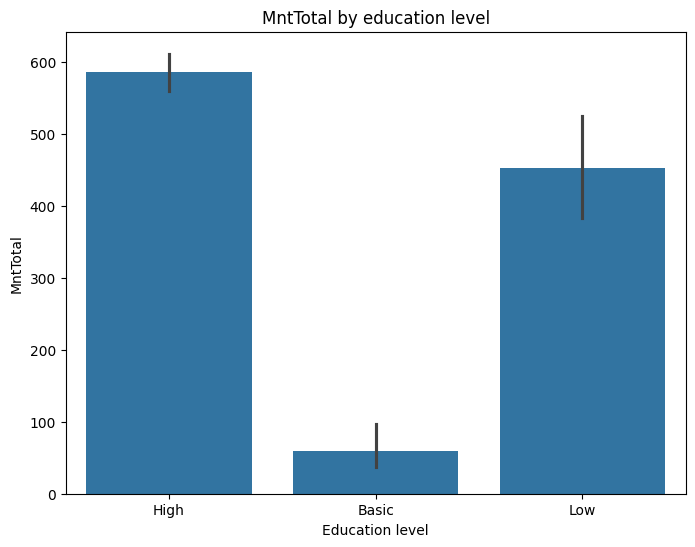

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Education_level', y='MntTotal', data=data)
plt.title('MntTotal by education level')
plt.xlabel('Education level')
plt.ylabel('MntTotal')

Customers with high education spend the most, followed by those with low education. Customers with basic education spend the least. 

In [25]:
def is_highly_educated(row):
    if row['education_Master'] == 1:
        return 1
    elif row['education_PhD'] == 1:
        return 1
    else:
        return 0
        
data['highly_educated'] = data.apply(is_highly_educated, axis=1)

In [26]:
data['highly_educated'].value_counts()

highly_educated
0    1364
1     838
Name: count, dtype: int64

Text(0, 0.5, 'MntTotal')

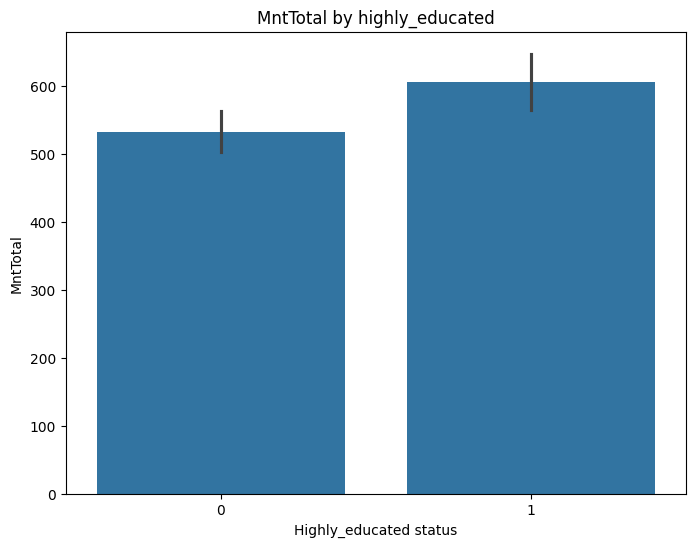

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='highly_educated', y='MntTotal', data=data)
plt.title('MntTotal by highly_educated')
plt.xlabel('Highly_educated status')
plt.ylabel('MntTotal')

Customers who are highly educated spend more than those who are not. 

In [28]:
def marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
        
data['Marital'] = data.apply(marital_status, axis=1)

Text(0, 0.5, 'MntTotal')

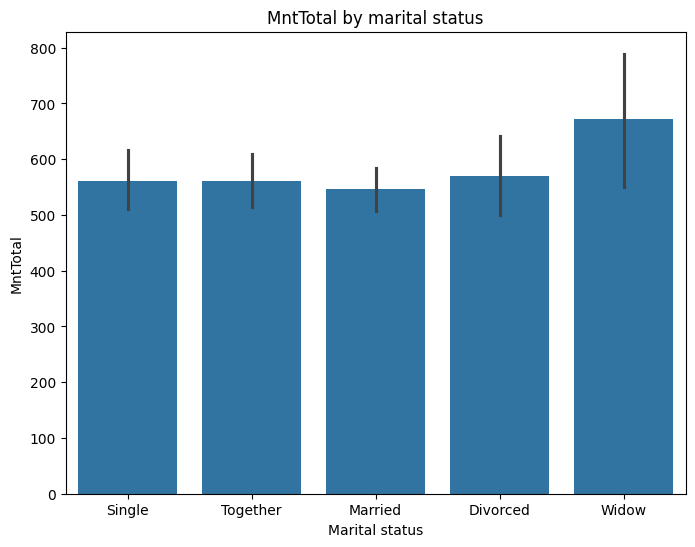

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data)
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

Customers who are widowed spend the most. Married people spend the least. Other categories are similar in spending. 

In [30]:
def in_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(in_relationship, axis=1)

Text(0, 0.5, 'MntTotal')

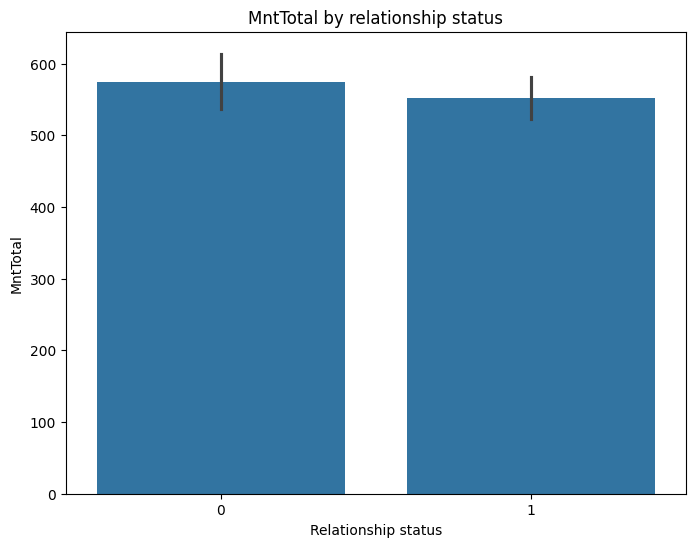

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x='In_relationship', y='MntTotal', data=data)
plt.title('MntTotal by relationship status')
plt.xlabel('Relationship status')
plt.ylabel('MntTotal')

Customers who are not in a relationship spend more than those who are. 

In [32]:
data['Is_Parent'] = (data['Kidhome'] + data['Teenhome'] > 0).astype(int)

Text(0, 0.5, 'MntTotal')

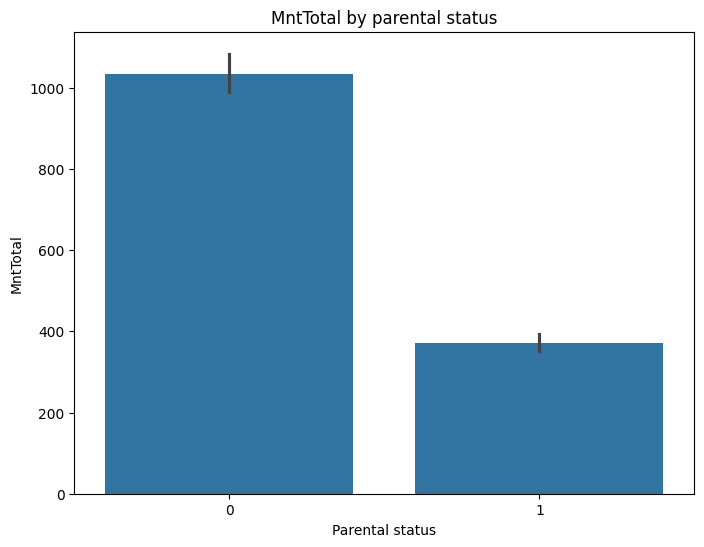

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Is_Parent', y='MntTotal', data=data)
plt.title('MntTotal by parental status')
plt.xlabel('Parental status')
plt.ylabel('MntTotal')

Customers without kids spend more than those without kids. 

# Clustering

In [34]:
clustering_cols = ['Income', 'MntTotal', 'In_relationship', 'Is_Parent', 'highly_educated', 'Recency', 'Complain', 'Response', 'Age', 'Customer_Days', 'AcceptedCmpOverall']

In [35]:
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[clustering_cols] = scaler.fit_transform(data[clustering_cols])

In [36]:
data_scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Education_level,highly_educated,Marital,In_relationship,Is_Parent
0,0.317669,0,0,0.310276,635,88,546,172,88,88,...,0,0,1.693815,1441,-0.43874,High,-0.783817,Single,-1.348874,-1.588458
1,-0.252786,1,1,-0.380865,11,1,6,2,1,6,...,0,0,-0.942701,15,-0.43874,High,-0.783817,Single,-1.348874,0.629541
2,0.969430,0,0,-0.795550,426,49,127,111,21,42,...,0,0,0.303874,692,-0.43874,High,-0.783817,Together,0.741359,-1.588458
3,-1.205543,1,0,-0.795550,11,4,20,10,3,5,...,0,0,-0.895496,43,-0.43874,High,-0.783817,Together,0.741359,0.629541
4,0.325166,1,0,1.554331,173,43,118,46,27,15,...,0,1,-0.267837,392,-0.43874,High,1.275808,Married,0.741359,0.629541


#### PCA

In [37]:
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[clustering_cols])

In [38]:
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

#### Elbow Method

In [39]:
X = data_scaled[clustering_cols]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

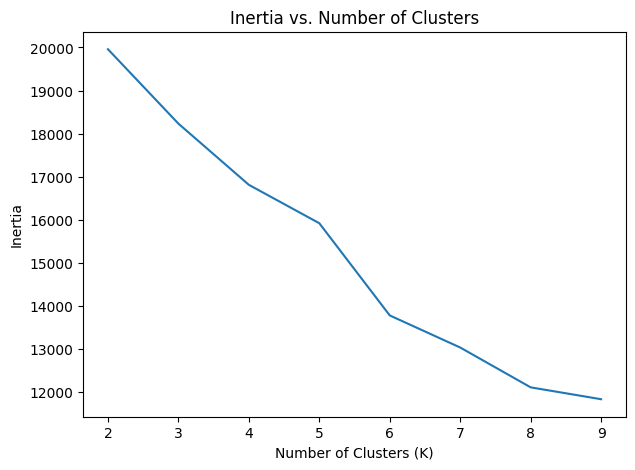

In [40]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list)
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

#### Silhouette score analysis

In [41]:
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

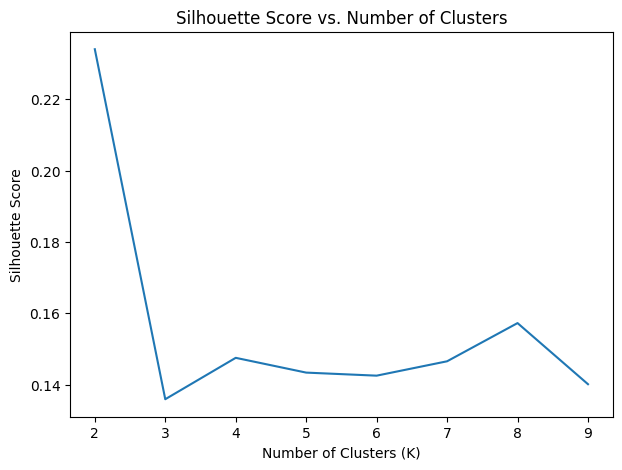

In [42]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [43]:
model = KMeans(n_clusters=2, random_state = 7)
model.fit(data_scaled[clustering_cols])
data_scaled['Cluster'] = model.predict(data_scaled[clustering_cols])

#### Visualisation of clusters

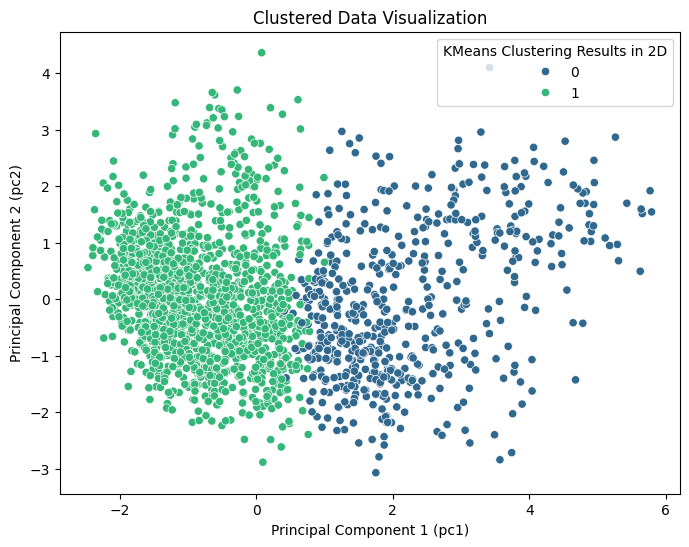

In [44]:
# Visualize the results in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='KMeans Clustering Results in 2D')

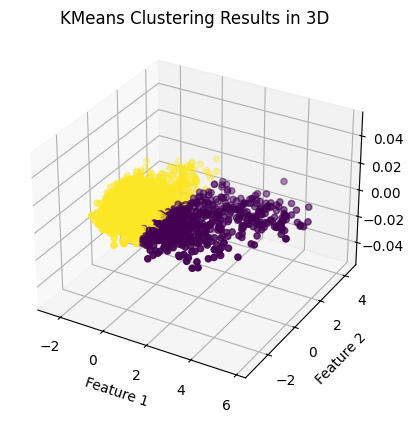

In [45]:
# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_res[:, 0], pca_res[:, 1], c=data_scaled['Cluster'], cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('')
ax.set_title('KMeans Clustering Results in 3D')
plt.show()

The clusters look very distinct. 

In [46]:
data['Cluster'] = data_scaled.Cluster

In [47]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Education_level,highly_educated,Marital,In_relationship,Is_Parent,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1529,1441,0,High,0,Single,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,21,15,0,High,0,Single,0,1,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,734,692,0,High,0,Together,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,48,43,0,High,0,Together,1,1,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,1,407,392,0,High,1,Married,1,1,1


# CUSTOMER SEGMENTATION BY CLUSTERS

##### Consumption by clusters

In [48]:
consumption_data = data.groupby('Cluster')[data_amnt].mean().reset_index()
consumption_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1288.173701,1215.011364,669.230519,57.115260,417.175325,85.363636,59.288961,73.162338
1,1,277.447667,244.753468,163.477932,14.264817,66.133670,19.157629,14.413619,32.694199


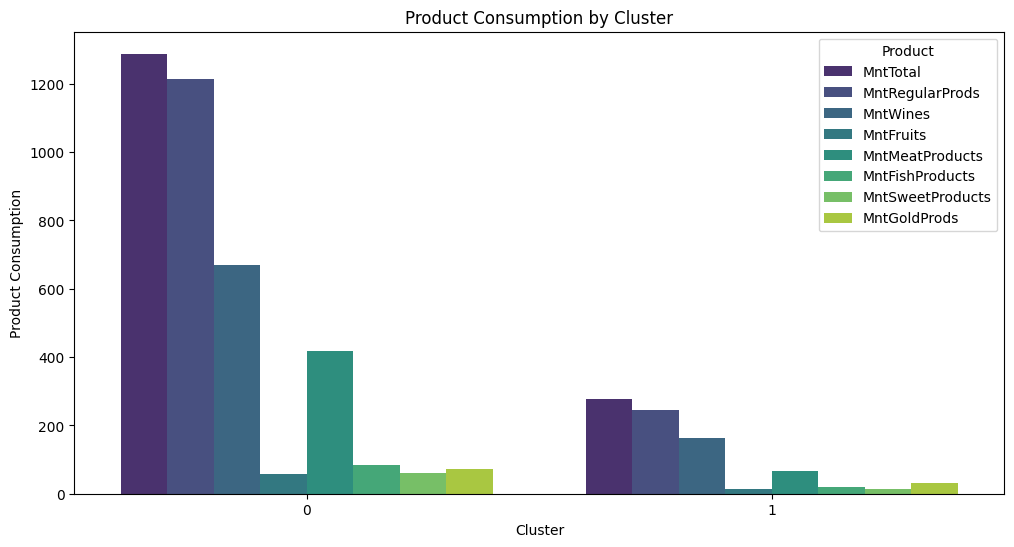

In [49]:
melted_data_cons = pd.melt(consumption_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data_cons, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

Overall, cluster 0 spends a lot more than cluster 1. Cluster 0 spends significantly more than cluster 1 on regular prods, wines and meat products.

##### Source of purchases and Total spenditure by cluster

In [50]:
source_purchase_data = data.groupby('Cluster')[data_source_of_purchase].sum().reset_index()
source_purchase_data.head()

,Cluster,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,945,3314,3459,5095,2097
1,1,4164,5715,2355,7716,9665


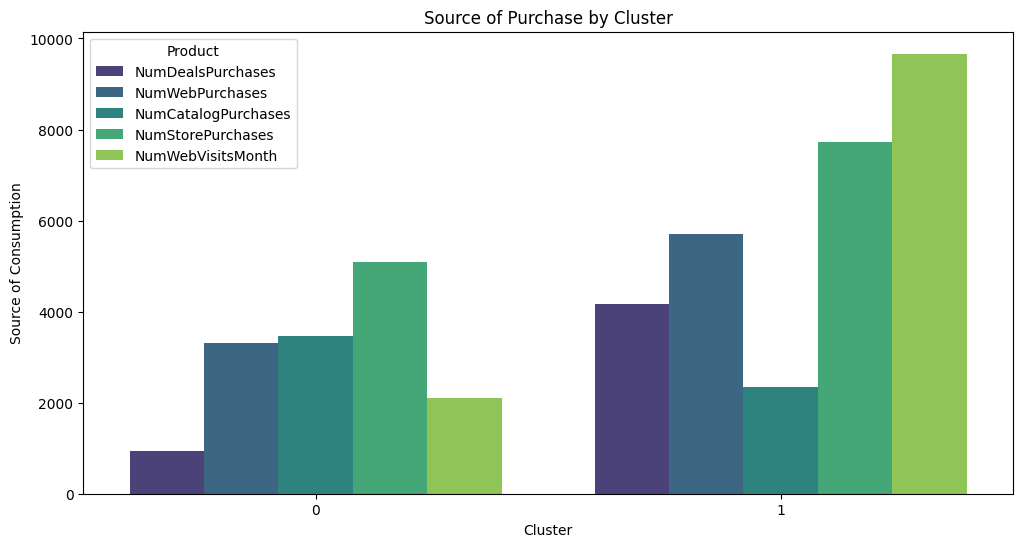

In [51]:
melted_data_source = pd.melt(source_purchase_data, id_vars="Cluster", var_name="Product", value_name="Source_of_purchase")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Source_of_purchase", hue="Product", data=melted_data_source, ci=None, palette="viridis")
plt.title("Source of Purchase by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Source of Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper left")

plt.show()

Except for catalog purchases, cluster 1 uses al sources significantly more than cluster 0. 

##### Income and Total spenditure by cluster

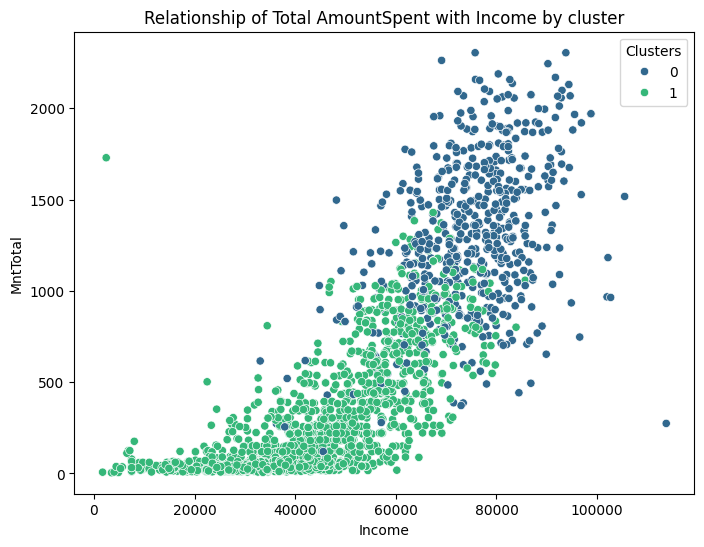

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='viridis')
plt.title('Relationship of Total AmountSpent with Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

Cluster 0 earns more than cluster 1, and as expected, also spends considerably more. We can see the income comparison in the boxplots below, where cluster 0 earns a lot more than cluster 1.

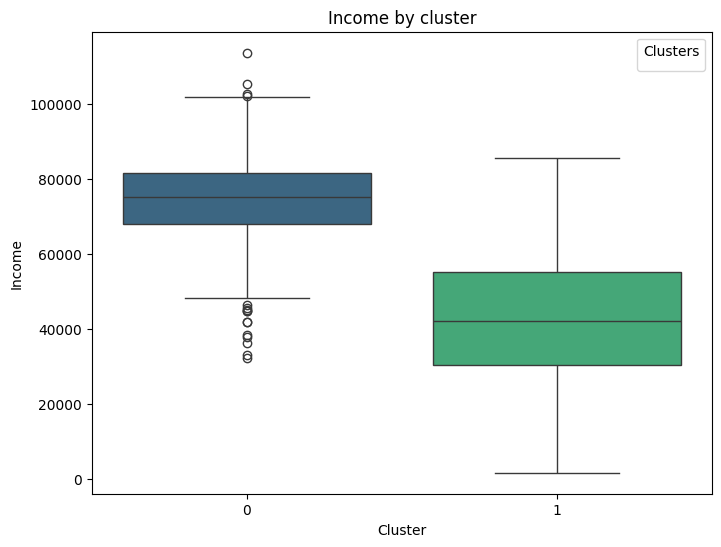

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

##### Relationship status by cluster

Text(0, 0.5, 'In_relationship')

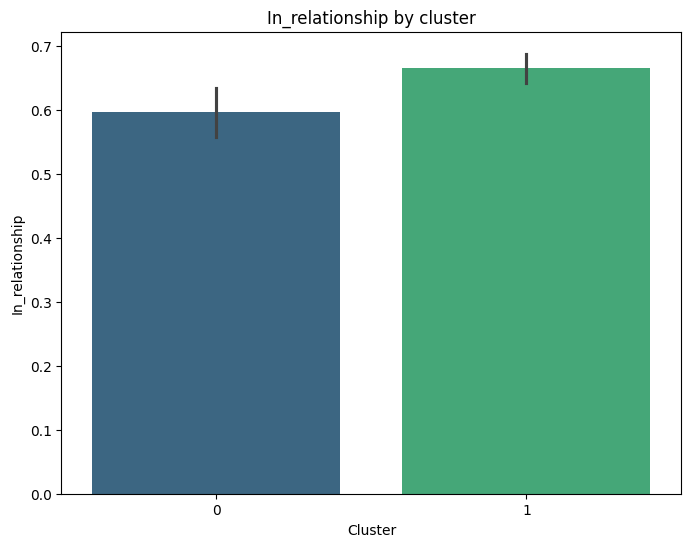

In [54]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=data, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

Cluster 0 is not in a relationship, cluster 1 is. 

##### Parental status by cluster

Text(0, 0.5, 'Is_Parent')

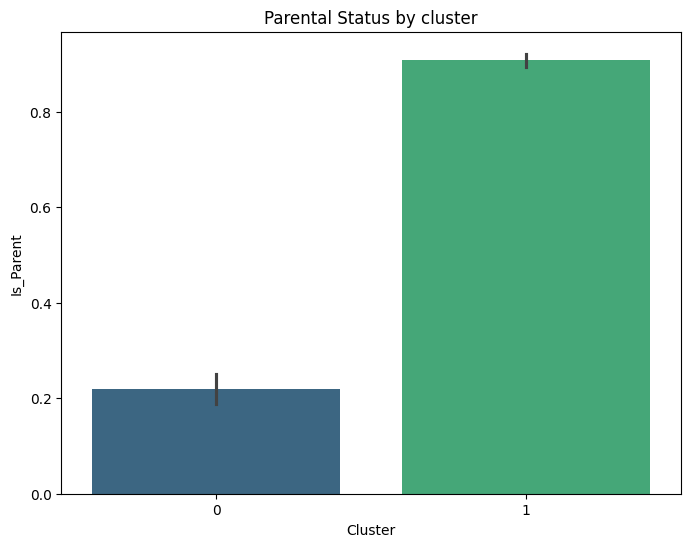

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Is_Parent', data=data, palette='viridis')
plt.title('Parental Status by cluster')
plt.xlabel('Cluster')
plt.ylabel('Is_Parent')

Cluster 0 is not parenting, cluster 1 is. 

### Cluster 0

Highly educated customers, Not in a relationship, Not parents, High income earners, High spenders

### Cluster 1

Less educated customers, In a relationship, Parents, Low income earners, Low spenders

In [56]:
# import jupytab

In [57]:
# data.to_csv('processed_data.csv', index=False) 

In [58]:
# check = data.groupby("Cluster")["highly_educated"].value_counts()

In [59]:
# print(check)

In [60]:
# check2 = data.groupby("Cluster")["Is_Parent"].value_counts()

In [61]:
# print(check2)